<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [46]:
serie = [0,9,2,0,2,5,5,0,0,5,1,9,2,1,3,6,5,4,4,0,2,5,0,0,7,5,5,1,5,0,5,2,1,6,4,0,3,
         7,6,4,6,4,9,3,5,5,5,5,6,0,0,5,2,6,1,0,2,6,6,5,4,2,6,0,2,5,4,0,5,5,3,6,6,1,
         2,1,0,4,1,4,5,6,8,1,9,0,9,2,6,7,4,2,0,3,1,5,0,5,4,9,6,5,0,5,9,9,2,5,
         1,1,7,7,9,8,1,8,7,0,2,7,6,1,1,6,6,5,9,2,7,9,0,1,2,9,7,9,2,0,7,5,5,5,5,7,9,
         9,0,7,5,5,6,0,4,3,5,5,3,5,0,2,0,5,0,5,6,4,3,4,9,2,6,2,8,0,4,7,6,5,2,0,3,2,
         3,0,6,2,6,6,4,5,0,6,1,4,9,6,0,3,6,9,5,0,2,4,3,5,0,5,6,4,5,5,0,3,2,0,2,1,7,
         3,3,2,5,3,5,7,5,1,3,5,9,4,6,6,5,2,0,4,0,5,0,7,2,1,5,9,5,7,4,0,3,4,5,4,0,5,
         2,2,5,4,9,7,6,0,5,5,5,5,0,0,3,5,2,2,3,9,5,7,5,3,5,9,5,4,0,2,4,4,6,1,0,5,0,
         5,0,7,0,0,0,0,2,4,4,3,0,4,3,0,2,6,0,6,5,2,6,5,0,5,5,0,2,2,5,2,4,9,0,2,5,6,
         1,0,0,0,5,8,0,5,3,0,0,3,5,0,0,2,5,2,7,2,5,0,4,5,6,9,0,5,4,0]

In [79]:
nodes = np.unique(serie)
n = len(nodes)
A = np.zeros(shape=(n,n))

In [82]:
for i in range(len(serie)-1):
    A[serie[i],serie[i+1]] = A[serie[i],serie[i+1]] + 1
    A

array([[33.,  3., 42., 24., 18., 54.,  9., 15.,  0.,  6.],
       [12.,  6.,  6.,  6.,  6.,  9.,  6.,  6.,  3.,  6.],
       [21., 15.,  9.,  6., 12., 30., 24.,  9.,  3.,  3.],
       [12.,  3.,  9.,  3.,  6., 27.,  9.,  3.,  0.,  3.],
       [24.,  3.,  6., 15.,  9., 15.,  9.,  3.,  0., 18.],
       [57., 12., 27., 15., 24., 48., 21., 12.,  3., 15.],
       [18., 18.,  6.,  0., 18., 24., 15.,  3.,  3.,  6.],
       [ 6.,  0.,  6.,  3.,  6., 15., 12.,  3.,  0., 12.],
       [ 6.,  6.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.],
       [15.,  0., 21.,  3.,  3., 12.,  6.,  6.,  3.,  6.]])

In [103]:
G = nx.Graph()
G.add_nodes_from(nodes)

In [104]:
rows = A.shape[0]
cols = A.shape[1]
for i in range(0, cols - 1):
    for j in range(0, rows -1):
        if A[i,j] != 0:
            G.add_edge(i, j)

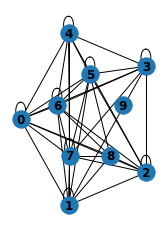

In [105]:
subax1 = plt.subplot(121)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

[Creating a graph Networkx](https://networkx.org/documentation/stable/tutorial.html)

[Drawing graphs Networkx](https://networkx.org/documentation/stable/tutorial.html#drawing-graphs)